In [1]:
#import xarray as xr

import numpy as np
import pandas as pd
from pathlib import Path

import os, sys
import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as tkr
#import seaborn as sns
#sns.set_style('ticks')

from scipy import stats
from scipy.stats import percentileofscore

from datetime import datetime, timedelta
from vtools.functions.filter import cosine_lanczos
from vtools.data.vtime import days, hours, minutes



/global/home/users/jennaisrael/.conda/envs/schimpy/lib/python3.7/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Plot the station data from https://dwrbdodatastore.azurewebsites.net/repoui to pick 6 events from 2013, 2014, and 2020, and maybe 2 from 2015 with the barrier

In [2]:
#function comes from schimpy metricsplot.py script https://github.com/CADWRDeltaModeling/schimpy/blob/master/schimpy/metricsplot.py
def filter_timeseries(tss, cutoff_period=hours(40)):
    """ Filter time series

        Parameters
        ----------

        Returns
        -------
        list of vtools.data.timeseries.TimeSeries
            filtered time series
    """

    filtered = []
    ts=tss #try removing the loop for now
    if ts is None:
        filtered.append(None)
    else:
        #print(ts)
        ts_filtered = cosine_lanczos(ts, cutoff_period=cutoff_period)
        ts_filtered.filtered = 'cosine_lanczos'
        #ts_filtered.unit = ts.unit
        #filtered.append(ts_filtered)
    # for ts in tss:
    #     if ts is None:
    #         filtered.append(None)
    #     else:
    #         print(ts)
    #         ts_filtered = cosine_lanczos(ts, cutoff_period=cutoff_period)
    #         ts_filtered.filtered = 'cosine_lanczos'
    #         ts_filtered.unit = ts.unit
    #         filtered.append(ts_filtered)
    return ts_filtered

In [3]:
# #load point reyes
# colnames=['datetime','elev[m]']
# dtformat = '%Y-%m-%dT%H:%M:%S'
# pryc=pd.read_csv('/global/scratch/users/jennaisrael/climate_data_processing/identify_stp/pryc1default_elev_screened_2021.csv', skiprows=73)
# pryc['datetime']=pd.to_datetime(pryc['datetime'],format=dtformat)#.asfreq('15min')
# pryc.set_index("datetime",inplace=True)
# pryc=pryc.asfreq('6min')
# #drop user_flag
# pryc.drop(columns='user_flag',inplace=True)
# #change value to elev[m]
# pryc=pryc.rename(columns={"value": "elev[m]"})
# pryc_filt=filter_timeseries(pryc)
# pryc_filt

# Try plotting the tidally filtered anomaly instead just elevation

In [4]:
# pr = pd.read_csv("/global/scratch/users/jennaisrael/time_varying_data/tide_gauge_data/utide.residuals.pointreyes.1996.2021.csv")

# dtformat = '%Y-%m-%dT%H:%M:%S'
# pr['Date Time'] = pd.to_datetime(pr['Date Time'],format=dtformat)#.asfreq('15min')
# pr.set_index("Date Time",inplace=True)
# pr.index.names = ['datetime']
# pr=pr.asfreq('6min')
# pr

In [5]:
# pr_resid_filt=filter_timeseries(pr.Residual)

In [6]:
# pr_resid_filt.plot()

In [7]:
# writepath="/global/scratch/users/jennaisrael/time_varying_data/tide_gauge_data"
# pr_resid_filt.to_csv(writepath+'/'+"filtered.residuals.pointreyes.1996.2021.csv")

In [3]:
#pd.read_csv("/global/scratch/users/jennaisrael/time_varying_data/tide_gauge_data/bcfiltered_SCHA_subtide_ptreyes.csv")

In [4]:
#UPDATE 09/21 use Eli's SCHA filter subtide that I then subtracted the 40 day box car from
ptreyes=pd.read_csv("/global/scratch/users/jennaisrael/time_varying_data/tide_gauge_data/bcfiltered_SCHA_subtide_ptreyes.csv")
dtformat = '%Y-%m-%dT%H:%M:%S'
ptreyes['datetime'] = pd.to_datetime(ptreyes['datetime'],format=dtformat)
pr_filt=ptreyes[['datetime','box_40d_filt']].rename(columns={"box_40d_filt": "Residual"})
pr_filt.set_index("datetime",inplace=True)
pr_filt

,Residual
datetime,
2012-01-03 01:30:00,NaN
2012-01-03 02:00:00,NaN
2012-01-03 02:30:00,NaN
2012-01-03 03:00:00,NaN
2012-01-03 03:30:00,NaN
...,...
2023-12-29 20:30:00,NaN
2023-12-29 21:00:00,NaN
2023-12-29 21:30:00,NaN


In [5]:
# #since I filtered and wrote this to a new file just open the filtered residuals
# pr_filt=pd.read_csv("/global/scratch/users/jennaisrael/time_varying_data/tide_gauge_data/filtered.residuals.pointreyes.1996.2021.csv")
# dtformat = '%Y-%m-%dT%H:%M:%S'
# pr_filt['datetime'] = pd.to_datetime(pr_filt['datetime'],format=dtformat)#.asfreq('15min')
# pr_filt.set_index("datetime",inplace=True)
# # pr.index.names = ['datetime']
# pr_filt=pr_filt.asfreq('6min')
# pr_filt

In [6]:
# #this is the easy way to index!!!!
# #pryc.loc['2013']
# pr_filt.loc['2013']

In [13]:
# #this did not work
# pryc.where(pryc.index.year==13)

# Load jersey point, franks tract, holland cut salinity concatenate into one dataframe

In [7]:

dtformat = '%Y-%m-%dT%H:%M:%S'

jer=pd.read_csv('/global/scratch/users/jennaisrael/climate_data_processing/identify_stp/jerdefault_ec_screened_2021.csv',skiprows=60)#.set_index("datetime")
jer=jer.rename(columns={"value": "jer_S[mS/cm]"})
jer['datetime']=pd.to_datetime(jer['datetime'],format=dtformat)
jer.set_index("datetime",inplace=True)
jer=jer.asfreq('15min')
jer_filt=filter_timeseries(jer)

frk=pd.read_csv('/global/scratch/users/jennaisrael/climate_data_processing/identify_stp/frkdefault_ec_screened_2021.csv',skiprows=65)#.set_index('datetime')
frk=frk.rename(columns={"value": "frk_S[mS/cm]"})
frk['datetime']=pd.to_datetime(frk['datetime'],format=dtformat)
frk.set_index("datetime",inplace=True)
frk=frk.asfreq('15min')
frk_filt=filter_timeseries(frk)

hll=pd.read_csv('/global/scratch/users/jennaisrael/climate_data_processing/identify_stp/hlldefault_ec_screened_2021.csv',skiprows=58)#.set_index('datetime')
hll=hll.rename(columns={"value": "hll_S[mS/cm]"})
hll['datetime']=pd.to_datetime(hll['datetime'],format=dtformat)
hll.set_index("datetime",inplace=True)
hll=hll.asfreq('15min')
hll_filt=filter_timeseries(hll)

# unit: microS/cm

In [8]:
#compare with data downloaded from DMS datastore, tidally filtered with cosine lanczos
jer_dms=pd.read_csv("/global/scratch/users/jennaisrael/climate_data_processing/identify_stp/dms_data_jer.csv")
jer_dms=jer_dms.rename(columns={"screened/jer//usbr/JER/ec/microS/cm": "jer_S[mS/cm]"})
jer_dms['datetime']=pd.to_datetime(jer_dms['datetime'],format=dtformat)
jer_dms.set_index("datetime",inplace=True)
jer_dms=jer_dms.asfreq('15min')
jer_dms_filt=filter_timeseries(jer_dms)

sjj_dms=pd.read_csv("/global/scratch/users/jennaisrael/climate_data_processing/identify_stp/dms_data_sjj.csv")
sjj_dms=sjj_dms.rename(columns={"screened/sjj//usgs/11337190/ec/microS/cm": "sjj_S[mS/cm]"})
sjj_dms['datetime']=pd.to_datetime(sjj_dms['datetime'],format=dtformat)
sjj_dms.set_index("datetime",inplace=True)
sjj_dms=sjj_dms.asfreq('15min')
sjj_dms_filt=filter_timeseries(sjj_dms)

hol2_dms=pd.read_csv("/global/scratch/users/jennaisrael/climate_data_processing/identify_stp/dms_data_hol2.csv")
hol2_dms=hol2_dms.rename(columns={"screened/hol2//dwr_ncro/B95120/ec/microS/cm": "hol2_S[mS/cm]"})
hol2_dms['datetime']=pd.to_datetime(hol2_dms['datetime'],format=dtformat)
hol2_dms.set_index("datetime",inplace=True)
hol2_dms=hol2_dms.asfreq('15min')
hol2_dms_filt=filter_timeseries(hol2_dms)

In [9]:
sal=pd.concat([jer_filt,frk_filt,hll_filt])
sal.drop(columns='user_flag',inplace=True)
sal

,jer_S[mS/cm],frk_S[mS/cm],hll_S[mS/cm]
datetime,,,
1999-03-26 07:15:00,NaN,NaN,NaN
1999-03-26 07:30:00,NaN,NaN,NaN
1999-03-26 07:45:00,NaN,NaN,NaN
1999-03-26 08:00:00,NaN,NaN,NaN
1999-03-26 08:15:00,NaN,NaN,NaN
...,...,...,...
2025-07-18 22:00:00,NaN,NaN,NaN
2025-07-18 22:15:00,NaN,NaN,NaN
2025-07-18 22:30:00,NaN,NaN,NaN


/global/home/users/jennaisrael/.conda/envs/schimpy/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


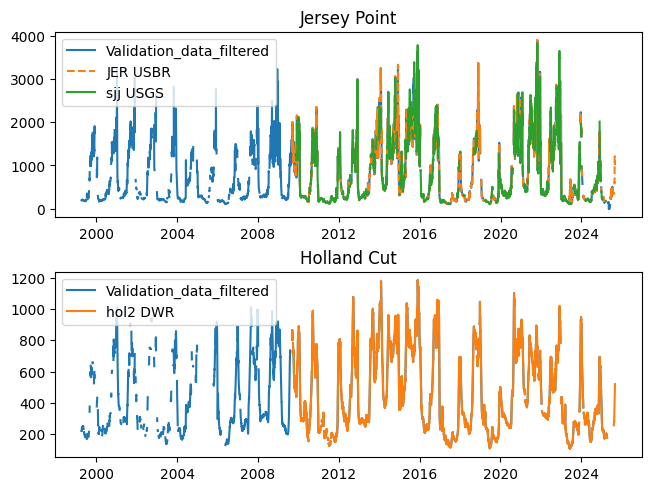

In [17]:
fig, ax =plt.subplots(2,1,layout="constrained")

ax[0].plot(sal['jer_S[mS/cm]'],label='Validation_data_filtered')
ax[0].plot(jer_dms_filt['jer_S[mS/cm]'],label='JER USBR',linestyle='--')
ax[0].plot(sjj_dms_filt['sjj_S[mS/cm]'],label='sjj USGS')
ax[0].set_title('Jersey Point')
ax[0].legend()

ax[1].plot(sal['hll_S[mS/cm]'],label='Validation_data_filtered')
ax[1].plot(hol2_dms_filt['hol2_S[mS/cm]'],label='hol2 DWR')
ax[1].set_title('Holland Cut')
ax[1].legend()

plt.show()

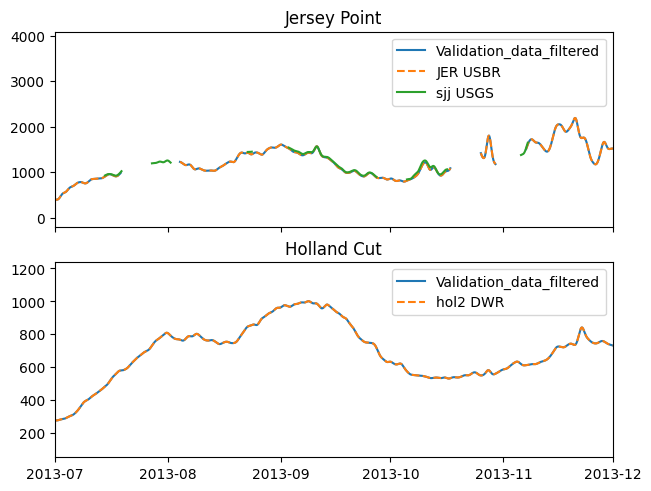

In [8]:
fig, ax =plt.subplots(2,1,layout="constrained",sharex=True)

ax[0].plot(sal['jer_S[mS/cm]'],label='Validation_data_filtered')
ax[0].plot(jer_dms_filt['jer_S[mS/cm]'],label='JER USBR',linestyle='--')
ax[0].plot(sjj_dms_filt['sjj_S[mS/cm]'],label='sjj USGS')
ax[0].set_title('Jersey Point')
ax[0].legend()

ax[1].plot(sal['hll_S[mS/cm]'],label='Validation_data_filtered')
ax[1].plot(hol2_dms_filt['hol2_S[mS/cm]'],label='hol2 DWR',linestyle='--')
ax[1].set_title('Holland Cut')
ax[1].legend()

ax[0].set_xlim(datetime(2013,7,1),datetime(2013,12,1))

plt.show()

In [19]:
# #tidally filter everything with the cosine lancoz filter
# pryc_filt=filter_timeseries(pryc)
# sal_filt=filter_timeseries(sal)
# sal_filt

# Load flux data for plotting exports and inflows

In [10]:
#read in the flux data so I can plot outflow
flux1=pd.read_csv('/global/scratch/users/jennaisrael/climate_data_processing/sl_regression/flux_from_bdschism_2025_06_05.csv',parse_dates=["datetime"],dtype=np.float32).set_index(["datetime"])#, names=['time','coyote','ccc_rock','ccc_old','swp','cvp','sjr','calaveras','east','american','sac','yolo_toedrain','yolo','northbay','napa','ccc_victoria'])
flux1


,coyote,ccc_rock,ccc_old,swp,cvp,sjr,calaveras,east,american,sac,yolo_toedrain,yolo,northbay,napa,ccc_victoria
datetime,,,,,,,,,,,,,,,
2006-10-01 00:00:00,-0.62,0.67,4.52,262.320007,120.830002,-94.860001,0.0,-25.780001,-72.769997,-330.570007,0.68,0.00,2.48,-0.01,0.0
2006-10-01 00:15:00,-0.62,0.67,4.52,263.239990,120.820000,-94.860001,0.0,-25.730000,-71.919998,-330.640015,-4.62,0.00,2.46,-0.01,0.0
2006-10-01 00:30:00,-0.62,0.66,4.52,263.410004,120.820000,-95.430000,0.0,-25.690001,-73.339996,-331.000000,-8.10,0.00,2.46,-0.01,0.0
2006-10-01 00:45:00,-0.62,0.66,4.52,263.390015,120.820000,-94.860001,0.0,-25.660000,-73.910004,-331.070007,-9.66,0.00,2.45,-0.01,0.0
2006-10-01 01:00:00,-0.62,0.66,4.52,263.350006,120.820000,-94.860001,0.0,-25.629999,-73.910004,-331.420013,-10.65,0.00,2.45,-0.01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-13 23:00:00,-0.84,2.46,4.18,1.680000,24.850000,-179.250000,0.0,-63.320000,-116.379997,-749.340027,0.06,-0.01,1.55,-1.68,0.0
2024-05-13 23:15:00,-0.84,2.44,4.22,1.700000,24.719999,-180.100006,0.0,-63.450001,-115.820000,-749.340027,0.06,-0.01,1.55,-1.65,0.0
2024-05-13 23:30:00,-0.84,2.41,4.27,1.720000,24.570000,-179.529999,0.0,-63.360001,-116.379997,-749.340027,0.06,-0.01,1.55,-1.65,0.0


In [11]:
# Add a column for total exports, sum of State water project and Central Valley water project 
flux1['exports']=flux1['swp']+flux1['cvp']

# Plot one year at a time, focus on Fall

In [20]:
#this is huge so trim before plotting
sal13=sal.loc['2013']
#pryc13=pryc_filt.loc['2013']
pr_filt13=pr_filt.loc['2013']
sal13

,jer_S[mS/cm],frk_S[mS/cm],hll_S[mS/cm]
datetime,,,
2013-01-01 00:00:00,195.403436,NaN,NaN
2013-01-01 00:15:00,195.429810,NaN,NaN
2013-01-01 00:30:00,195.456247,NaN,NaN
2013-01-01 00:45:00,195.482731,NaN,NaN
2013-01-01 01:00:00,195.509247,NaN,NaN
...,...,...,...
2013-12-31 22:45:00,NaN,NaN,871.924253
2013-12-31 23:00:00,NaN,NaN,871.981854
2013-12-31 23:15:00,NaN,NaN,872.038988


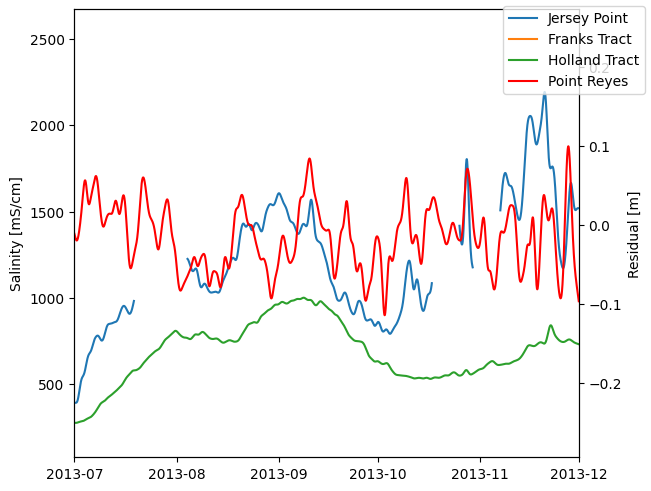

In [21]:
fig, ax = plt.subplots(layout="constrained",sharex=True)

ax.plot(sal13['jer_S[mS/cm]'],label='Jersey Point')
ax.plot(sal13['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal13['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

#ax2.plot(pryc13['elev[m]'], label='Point Reyes',color='r')
#ax2.set_ylabel("Elevation [m]")
ax2.plot(pr_filt13['Residual'], label='Point Reyes',color='r')
ax2.set_ylabel("Residual [m]")

ax.set_xlim(datetime(2013,7,1),datetime(2013,12,1))
fig.legend()

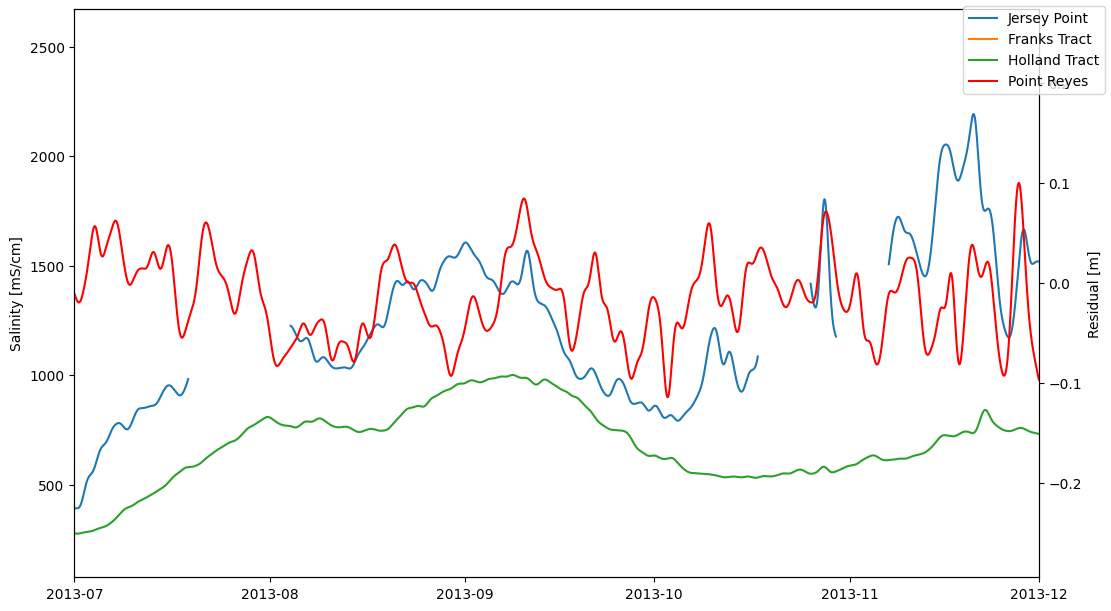

In [22]:
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal13['jer_S[mS/cm]'],label='Jersey Point')
ax.plot(sal13['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal13['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

# ax2.plot(pryc13['elev[m]'], label='Point Reyes',color='r')
# ax2.set_ylabel("Elevation [m]")
ax2.plot(pr_filt13['Residual'], label='Point Reyes',color='r')
ax2.set_ylabel("Residual [m]")

ax.set_xlim(datetime(2013,7,1),datetime(2013,12,1))
fig.legend()

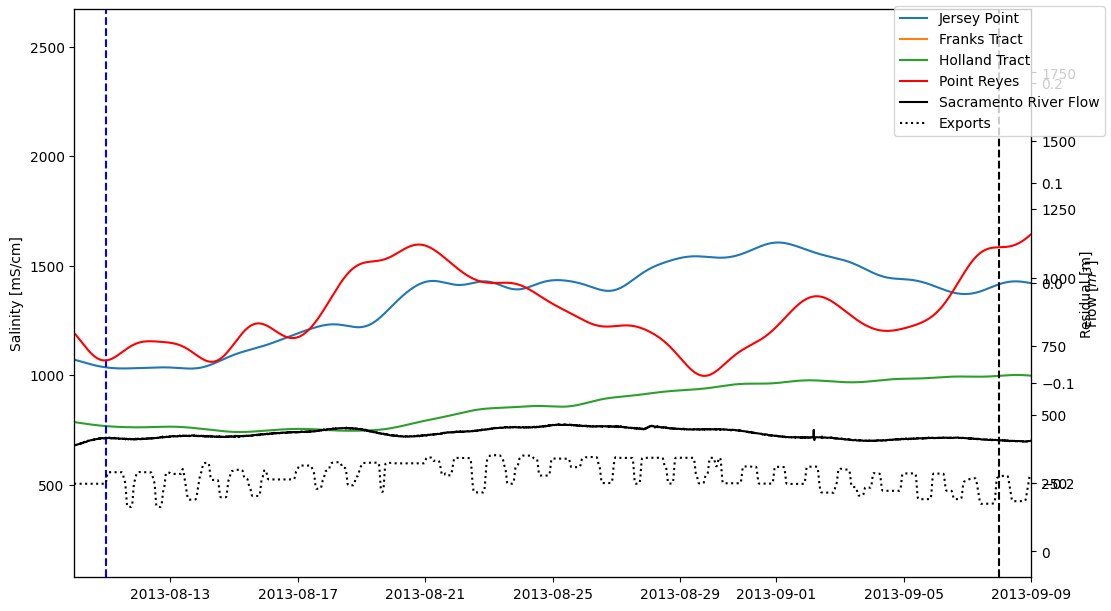

In [25]:
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal13['jer_S[mS/cm]'],label='Jersey Point')
ax.plot(sal13['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal13['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

# ax2.plot(pryc13['elev[m]'], label='Point Reyes',color='r')
# ax2.set_ylabel("Elevation [m]")

ax2.plot(pr_filt13['Residual'], label='Point Reyes',color='r')
ax2.set_ylabel("Residual [m]")

ax3=ax.twinx()

ax3.plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
ax3.set_ylabel("Flow [$m^3$]")

ax3.plot(flux1.exports, label="Exports", color='k',linestyle=':')
ax3.set_ylabel("Flow [$m^3$]")

#add vertical lines for start and end of subtidal pumping events
#start 1
ax.axvline(x = datetime(2013,7,18), color = 'b',linestyle='--')#, label = 'axvline - full height')
#end 1
ax.axvline(x = datetime(2013,8,1), color = 'k',linestyle='--')
#start 2
ax.axvline(x = datetime(2013,8,11), color = 'b',linestyle='--')
#end 2
ax.axvline(x = datetime(2013,9,8), color = 'k',linestyle='--')

# #Edit 08/12 add lines for peaks of events for looking at the maps
# #peak 2
# ax.axvline(x = datetime(2013,8,21), color = 'm',linestyle='--')

# #peak at Jersey Point
# ax.axvline(x = datetime(2013,9,1), color = 'c',linestyle='--')

ax.set_xlim(datetime(2013,8,10),datetime(2013,9,9))
#ax.set_xlim(datetime(2013,7,1),datetime(2014,1,1))
fig.legend()



#repeat for 2014 and 2020

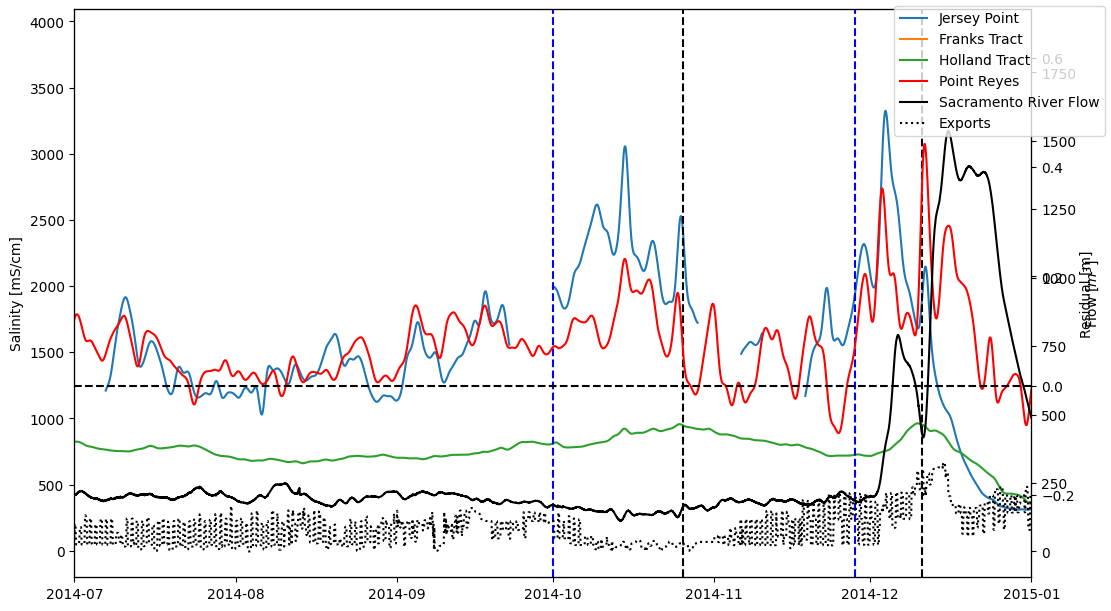

In [26]:
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal['jer_S[mS/cm]'],label='Jersey Point')
ax.plot(sal['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

# ax2.plot(pryc_filt['elev[m]'], label='Point Reyes',color='r')
# ax2.set_ylabel("Elevation [m]")
ax2.plot(pr_filt['Residual'], label='Point Reyes',color='r')
ax2.set_ylabel("Residual [m]")
ax2.axhline(y=0, color = 'k',linestyle='--')

ax3=ax.twinx()

ax3.plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
ax3.set_ylabel("Flow [$m^3$]")

ax3.plot(flux1.exports, label="Exports", color='k',linestyle=':')
ax3.set_ylabel("Flow [$m^3$]")

#add vertical lines for start and end of subtidal pumping events
#start 1
ax.axvline(x = datetime(2014,10,1), color = 'b',linestyle='--')#, label = 'axvline - full height')
#end 1
ax.axvline(x = datetime(2014,10,26), color = 'k',linestyle='--')
#start 2
ax.axvline(x = datetime(2014,11,28), color = 'b',linestyle='--')
#end 2
ax.axvline(x = datetime(2014,12,11), color = 'k',linestyle='--')

ax.set_xlim(datetime(2014,7,1),datetime(2015,1,1))
fig.legend()



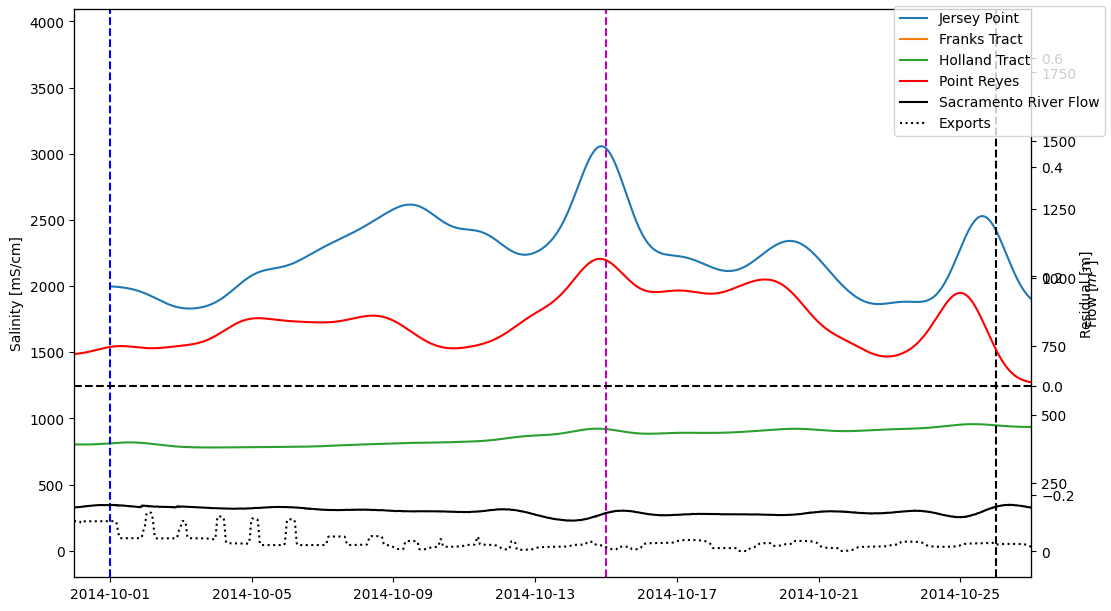

In [27]:
#add some more lines and limit the time range to identify events
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal['jer_S[mS/cm]'],label='Jersey Point')
ax.plot(sal['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

# ax2.plot(pryc_filt['elev[m]'], label='Point Reyes',color='r')
# ax2.set_ylabel("Elevation [m]")

ax2.plot(pr_filt['Residual'], label='Point Reyes',color='r')
ax2.set_ylabel("Residual [m]")
ax2.axhline(y=0, color = 'k',linestyle='--')

ax3=ax.twinx()

ax3.plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
ax3.set_ylabel("Flow [$m^3$]")

ax3.plot(flux1.exports, label="Exports", color='k',linestyle=':')
ax3.set_ylabel("Flow [$m^3$]")



#add vertical lines for start and end of subtidal pumping events
#start 1
ax.axvline(x = datetime(2014,10,1), color = 'b',linestyle='--')#, label = 'axvline - full height')
#end 1
ax.axvline(x = datetime(2014,10,26), color = 'k',linestyle='--')
#start 2
ax.axvline(x = datetime(2014,11,28), color = 'b',linestyle='--')
#end 2
ax.axvline(x = datetime(2014,12,11), color = 'k',linestyle='--')

#peak 1
ax.axvline(x = datetime(2014,10,15), color = 'm',linestyle='--')



ax.set_xlim(datetime(2014,9,30),datetime(2014,10,27))
fig.legend()


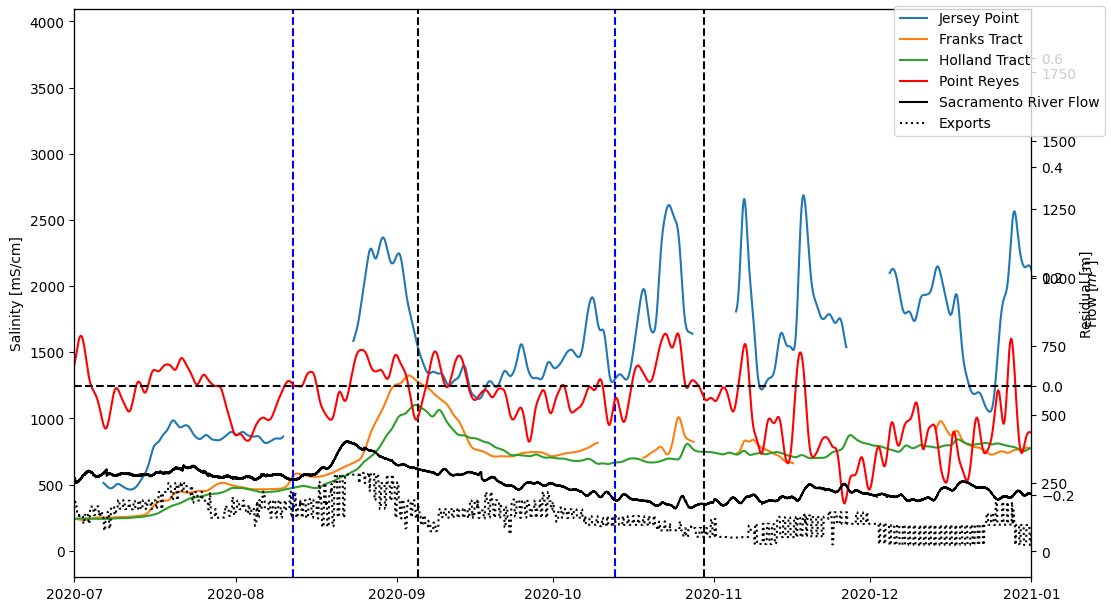

In [28]:
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal['jer_S[mS/cm]'],label='Jersey Point')
ax.plot(sal['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

# ax2.plot(pryc_filt['elev[m]'], label='Point Reyes',color='r')
# ax2.set_ylabel("Elevation [m]")

ax2.plot(pr_filt['Residual'], label='Point Reyes',color='r')
ax2.set_ylabel("Residual [m]")
ax2.axhline(y=0, color = 'k',linestyle='--')

ax3=ax.twinx()

ax3.plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
ax3.set_ylabel("Flow [$m^3$]")

ax3.plot(flux1.exports, label="Exports", color='k',linestyle=':')
ax3.set_ylabel("Flow [$m^3$]")

#add vertical lines for start and end of subtidal pumping events
#start 1
ax.axvline(x = datetime(2020,8,12), color = 'b',linestyle='--')#, label = 'axvline - full height')
#end 1
ax.axvline(x = datetime(2020,9,5), color = 'k',linestyle='--')
#start 2
ax.axvline(x = datetime(2020,10,13), color = 'b',linestyle='--')
#end 2
ax.axvline(x = datetime(2020,10,30), color = 'k',linestyle='--')

ax.set_xlim(datetime(2020,7,1),datetime(2021,1,1))
fig.legend()



# Plot a few more years to see how many events we can get to aid in classifying

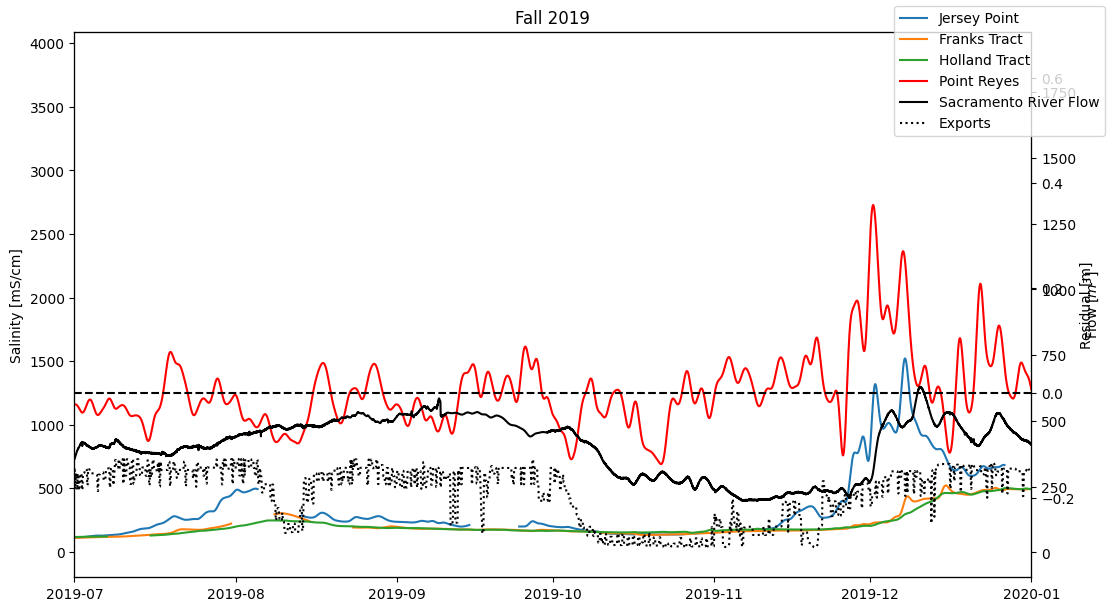

In [29]:
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal['jer_S[mS/cm]'],label='Jersey Point')
ax.plot(sal['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

ax2.plot(pr_filt['Residual'], label='Point Reyes',color='r')
ax2.set_ylabel("Residual [m]")
# ax2.plot(pryc_filt['elev[m]'], label='Point Reyes',color='r')
# ax2.set_ylabel("Elevation [m]")


ax2.axhline(y=0, color = 'k',linestyle='--')

ax3=ax.twinx()

ax3.plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
ax3.set_ylabel("Flow [$m^3$]")
ax3.plot(flux1.exports, label="Exports", color='k',linestyle=':')
ax3.set_ylabel("Flow [$m^3$]")

# #add vertical lines for start and end of subtidal pumping events
# #start 1
# ax.axvline(x = datetime(2019,8,12), color = 'b',linestyle='--')#, label = 'axvline - full height')
# #end 1
# ax.axvline(x = datetime(2019,9,5), color = 'k',linestyle='--')
# #start 2
# ax.axvline(x = datetime(2019,10,13), color = 'b',linestyle='--')
# #end 2
# ax.axvline(x = datetime(2019,1,30), color = 'k',linestyle='--')

ax.set_xlim(datetime(2019,7,1),datetime(2020,1,1))
ax.set_title('Fall 2019')

fig.legend()



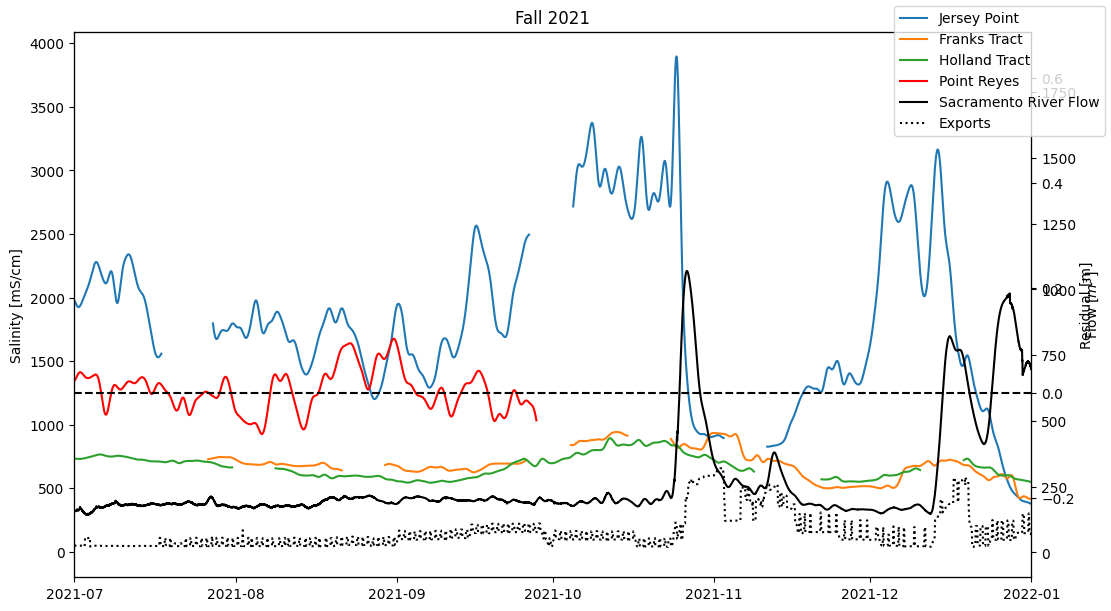

In [30]:
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal['jer_S[mS/cm]'],label='Jersey Point')
ax.plot(sal['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

ax2.plot(pr_filt['Residual'], label='Point Reyes',color='r')
ax2.set_ylabel("Residual [m]")
# ax2.plot(pryc_filt['elev[m]'], label='Point Reyes',color='r')
# ax2.set_ylabel("Elevation [m]")


ax2.axhline(y=0, color = 'k',linestyle='--')

ax3=ax.twinx()

ax3.plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
ax3.set_ylabel("Flow [$m^3$]")
ax3.plot(flux1.exports, label="Exports", color='k',linestyle=':')
ax3.set_ylabel("Flow [$m^3$]")

# #add vertical lines for start and end of subtidal pumping events
# #start 1
# ax.axvline(x = datetime(2019,8,12), color = 'b',linestyle='--')#, label = 'axvline - full height')
# #end 1
# ax.axvline(x = datetime(2019,9,5), color = 'k',linestyle='--')
# #start 2
# ax.axvline(x = datetime(2019,10,13), color = 'b',linestyle='--')
# #end 2
# ax.axvline(x = datetime(2019,1,30), color = 'k',linestyle='--')

ax.set_xlim(datetime(2021,7,1),datetime(2022,1,1))
ax.set_title('Fall 2021')

fig.legend()



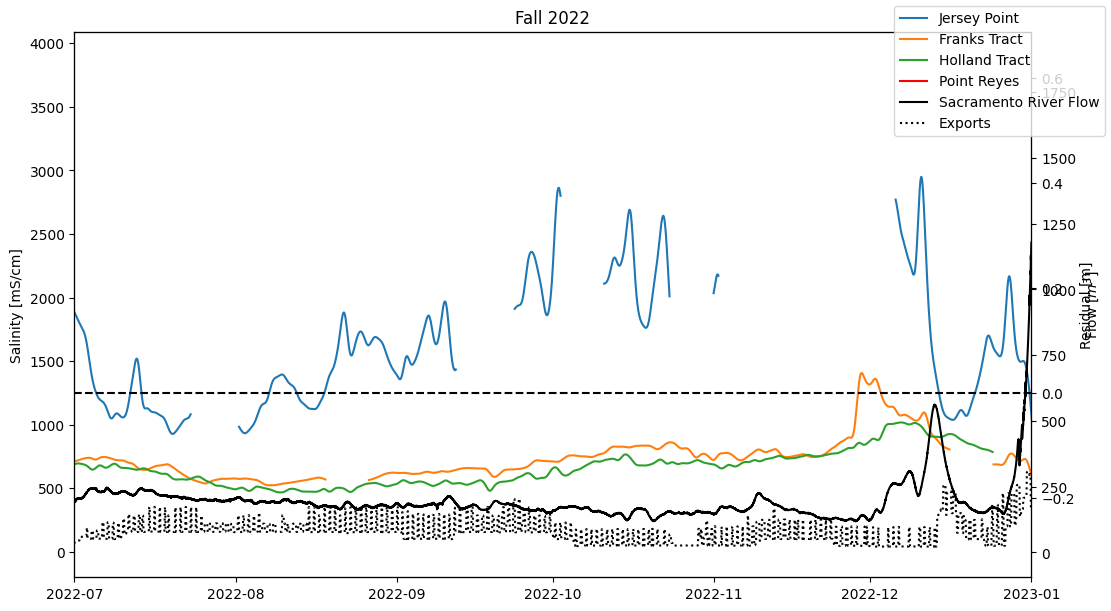

In [31]:
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal['jer_S[mS/cm]'],label='Jersey Point')
ax.plot(sal['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

ax2.plot(pr_filt['Residual'], label='Point Reyes',color='r')
ax2.set_ylabel("Residual [m]")
# ax2.plot(pryc_filt['elev[m]'], label='Point Reyes',color='r')
# ax2.set_ylabel("Elevation [m]")


ax2.axhline(y=0, color = 'k',linestyle='--')

ax3=ax.twinx()

ax3.plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
ax3.set_ylabel("Flow [$m^3$]")
ax3.plot(flux1.exports, label="Exports", color='k',linestyle=':')
ax3.set_ylabel("Flow [$m^3$]")

# #add vertical lines for start and end of subtidal pumping events
# #start 1
# ax.axvline(x = datetime(2019,8,12), color = 'b',linestyle='--')#, label = 'axvline - full height')
# #end 1
# ax.axvline(x = datetime(2019,9,5), color = 'k',linestyle='--')
# #start 2
# ax.axvline(x = datetime(2019,10,13), color = 'b',linestyle='--')
# #end 2
# ax.axvline(x = datetime(2019,1,30), color = 'k',linestyle='--')

ax.set_xlim(datetime(2022,7,1),datetime(2023,1,1))
ax.set_title('Fall 2022')

fig.legend()



In [32]:
jer

,jer_S[mS/cm],user_flag
datetime,,
1999-03-26 07:15:00,166.0,NaN
1999-03-26 07:30:00,166.0,NaN
1999-03-26 07:45:00,167.0,NaN
1999-03-26 08:00:00,170.0,NaN
1999-03-26 08:15:00,171.0,NaN
...,...,...
2025-07-18 22:00:00,496.0,NaN
2025-07-18 22:15:00,496.0,NaN
2025-07-18 22:30:00,509.0,NaN


# Can sea level pressure help identify an event?

In [12]:
df_m=pd.read_csv("/global/scratch/users/jennaisrael/climate_data_processing/sl_regression/monterey.regression.data.hourly.1996.2020.csv",parse_dates=['time']).set_index(['time'])
#the variable "Residual" is what we want it is calculated by subtracting from utide predicted tide, see notebook global
#/scratch/users/jennaisrael/climate_data_processing/sl_regression/detrended_residuals_utide.ipynb
df_pr=pd.read_csv("/global/scratch/users/jennaisrael/climate_data_processing/sl_regression/point_reyes.regression.data.hourly.1996.2020.csv",parse_dates=['time']).set_index(['time'])
df_m

,u10_stress_a,v10_stress_a,msl_a,sst_a,PDO_a,EN3.4_a,Residual
time,,,,,,,
1995-12-31 16:00:00,8.956125,-43.981939,736.900563,0.659997,0.836933,-1.306148,-0.041708
1995-12-31 17:00:00,5.255560,-33.640463,771.835528,0.659997,0.836933,-1.306148,-0.049622
1995-12-31 18:00:00,4.653470,-29.136661,734.585493,0.659997,0.836933,-1.306148,-0.050717
1995-12-31 19:00:00,7.100264,-24.445409,689.835457,0.659997,0.836933,-1.306148,-0.043857
1995-12-31 20:00:00,15.985210,-32.178663,623.085422,0.659997,0.836933,-1.306148,-0.056559
...,...,...,...,...,...,...,...
2021-10-01 19:00:00,-1.437500,0.301881,-145.706222,1.620365,-2.707063,-1.352207,-0.005646
2021-10-01 20:00:00,1.117509,-0.157175,-153.396257,1.620364,-2.707063,-1.352207,-0.015753
2021-10-01 21:00:00,1.308850,0.070465,-179.146292,1.620364,-2.707063,-1.352207,-0.019239


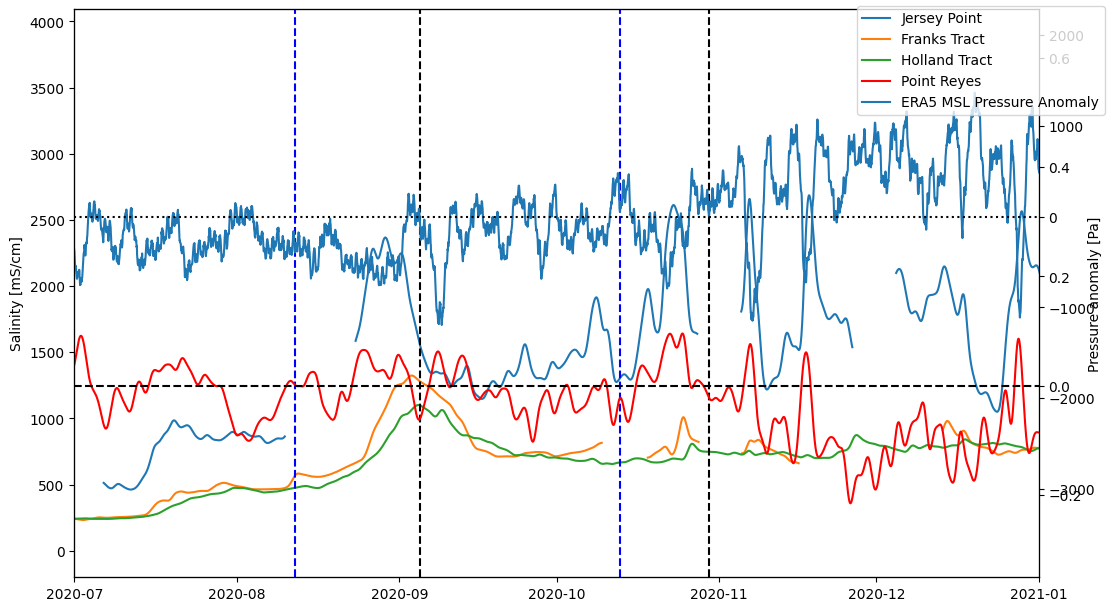

In [34]:
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal['jer_S[mS/cm]'],label='Jersey Point')
ax.plot(sal['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

# ax2.plot(pryc_filt['elev[m]'], label='Point Reyes',color='r')
# ax2.set_ylabel("Elevation [m]")

ax2.plot(pr_filt['Residual'], label='Point Reyes',color='r')
ax2.set_ylabel("Residual [m]")
ax2.axhline(y=0, color = 'k',linestyle='--')

ax3=ax.twinx()

ax3.plot(df_pr['msl_a'],label='ERA5 MSL Pressure Anomaly')
ax2.set_ylabel("Pressure anomaly [Pa]")
ax3.axhline(y=0, color = 'k',linestyle=':')

# ax3.plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
# ax3.set_ylabel("Flow [$m^3$]")

# ax3.plot(flux1.exports, label="Exports", color='k',linestyle=':')
# ax3.set_ylabel("Flow [$m^3$]")

#add vertical lines for start and end of subtidal pumping events
#start 1
ax.axvline(x = datetime(2020,8,12), color = 'b',linestyle='--')#, label = 'axvline - full height')
#end 1
ax.axvline(x = datetime(2020,9,5), color = 'k',linestyle='--')
#start 2
ax.axvline(x = datetime(2020,10,13), color = 'b',linestyle='--')
#end 2
ax.axvline(x = datetime(2020,10,30), color = 'k',linestyle='--')

ax.set_xlim(datetime(2020,7,1),datetime(2021,1,1))
fig.legend()



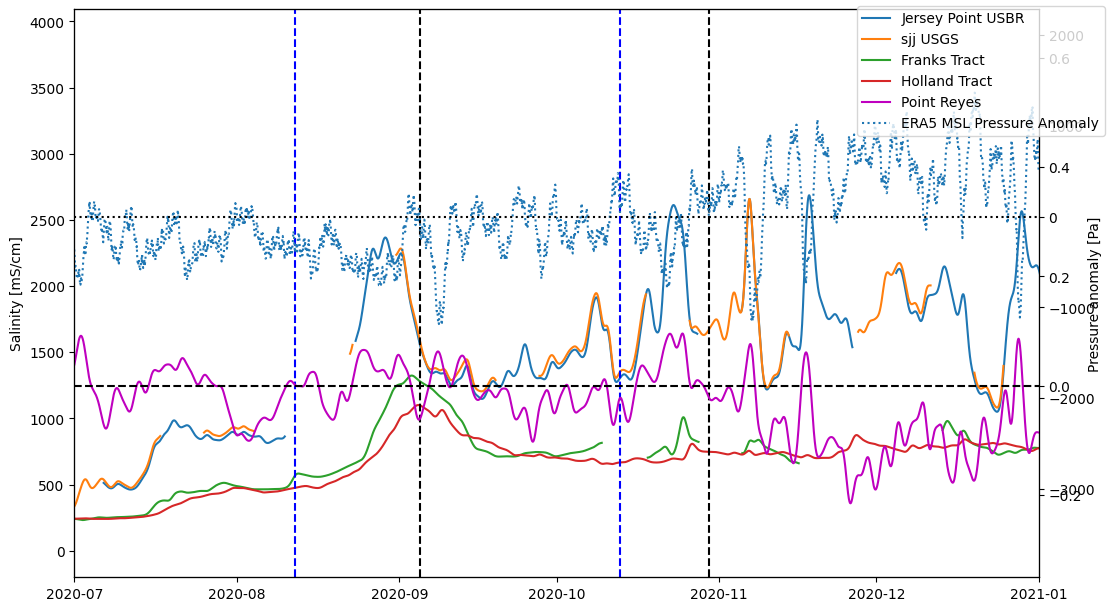

In [39]:
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal['jer_S[mS/cm]'],label='Jersey Point USBR')
#add the other jersey point station to see if we can fill in 
ax.plot(sjj_dms_filt['sjj_S[mS/cm]'],label='sjj USGS')
ax.plot(sal['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

# ax2.plot(pryc_filt['elev[m]'], label='Point Reyes',color='r')
# ax2.set_ylabel("Elevation [m]")

ax2.plot(pr_filt['Residual'], label='Point Reyes',color='m')
ax2.set_ylabel("Residual [m]")
ax2.axhline(y=0, color = 'k',linestyle='--')

ax3=ax.twinx()

ax3.plot(df_pr['msl_a'],label='ERA5 MSL Pressure Anomaly',linestyle=':')
ax2.set_ylabel("Pressure anomaly [Pa]")
ax3.axhline(y=0, color = 'k',linestyle=':')

# ax3.plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
# ax3.set_ylabel("Flow [$m^3$]")

# ax3.plot(flux1.exports, label="Exports", color='k',linestyle=':')
# ax3.set_ylabel("Flow [$m^3$]")

#add vertical lines for start and end of subtidal pumping events
#start 1
ax.axvline(x = datetime(2020,8,12), color = 'b',linestyle='--')#, label = 'axvline - full height')
#end 1
ax.axvline(x = datetime(2020,9,5), color = 'k',linestyle='--')
#start 2
ax.axvline(x = datetime(2020,10,13), color = 'b',linestyle='--')
#end 2
ax.axvline(x = datetime(2020,10,30), color = 'k',linestyle='--')

ax.set_xlim(datetime(2020,7,1),datetime(2021,1,1))
fig.legend()



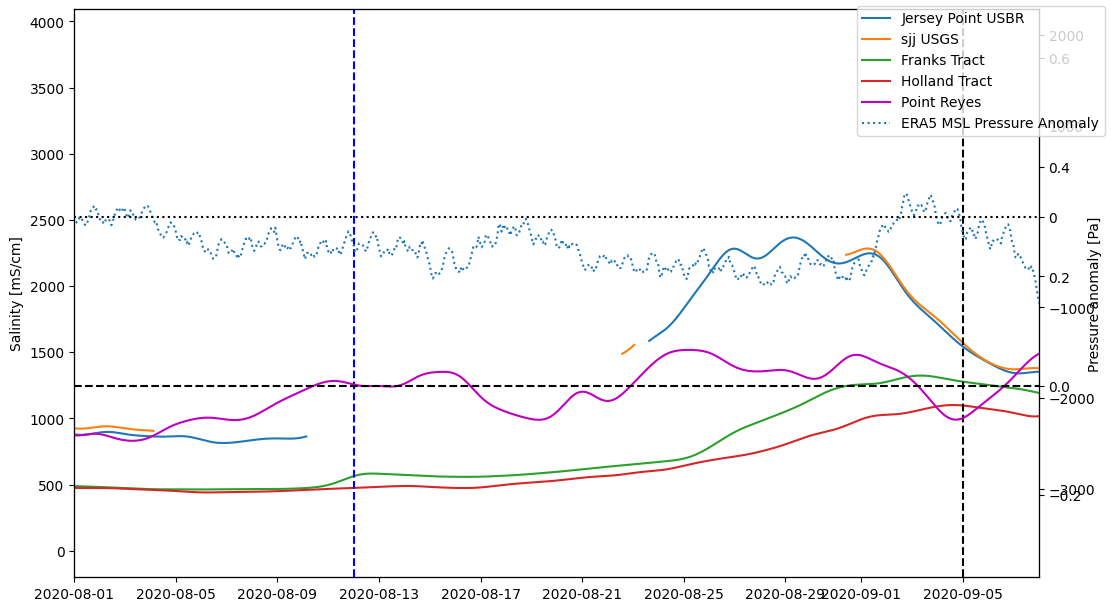

In [44]:
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal['jer_S[mS/cm]'],label='Jersey Point USBR')
#add the other jersey point station to see if we can fill in 
ax.plot(sjj_dms_filt['sjj_S[mS/cm]'],label='sjj USGS')
ax.plot(sal['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

# ax2.plot(pryc_filt['elev[m]'], label='Point Reyes',color='r')
# ax2.set_ylabel("Elevation [m]")

ax2.plot(pr_filt['Residual'], label='Point Reyes',color='m')
ax2.set_ylabel("Residual [m]")
ax2.axhline(y=0, color = 'k',linestyle='--')

ax3=ax.twinx()

ax3.plot(df_pr['msl_a'],label='ERA5 MSL Pressure Anomaly',linestyle=':')
ax2.set_ylabel("Pressure anomaly [Pa]")
ax3.axhline(y=0, color = 'k',linestyle=':')

# ax3.plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
# ax3.set_ylabel("Flow [$m^3$]")

# ax3.plot(flux1.exports, label="Exports", color='k',linestyle=':')
# ax3.set_ylabel("Flow [$m^3$]")

#add vertical lines for start and end of subtidal pumping events
#start 1
ax.axvline(x = datetime(2020,8,12), color = 'b',linestyle='--')#, label = 'axvline - full height')
#end 1
ax.axvline(x = datetime(2020,9,5), color = 'k',linestyle='--')
#start 2
ax.axvline(x = datetime(2020,10,13), color = 'b',linestyle='--')
#end 2
ax.axvline(x = datetime(2020,10,30), color = 'k',linestyle='--')

ax.set_xlim(datetime(2020,8,1),datetime(2020,9,8))
fig.legend()



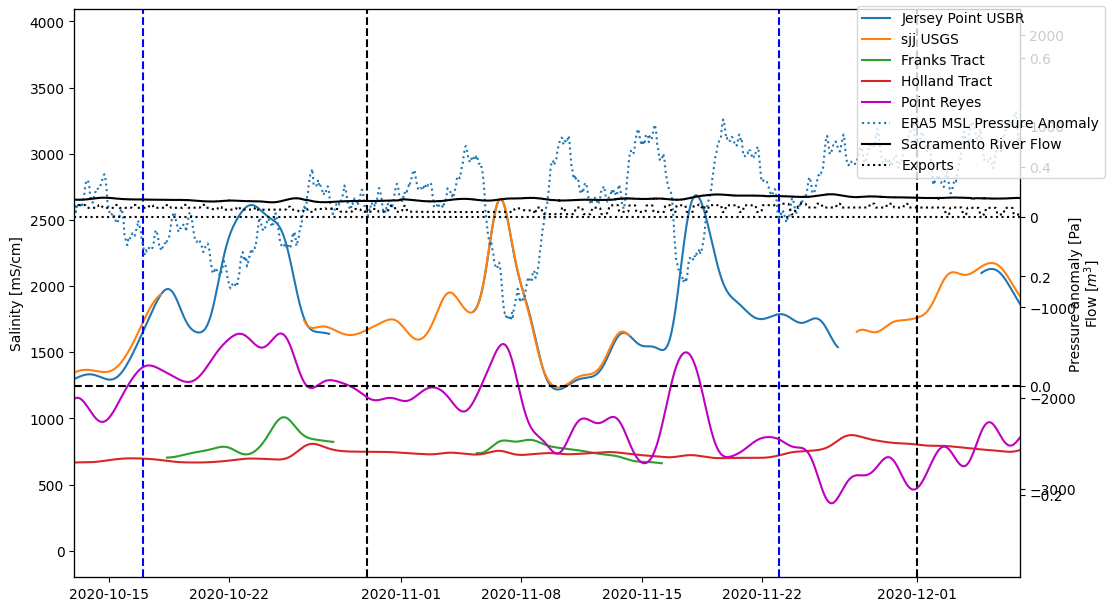

In [48]:
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal['jer_S[mS/cm]'],label='Jersey Point USBR')
#add the other jersey point station to see if we can fill in 
ax.plot(sjj_dms_filt['sjj_S[mS/cm]'],label='sjj USGS')
ax.plot(sal['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

# ax2.plot(pryc_filt['elev[m]'], label='Point Reyes',color='r')
# ax2.set_ylabel("Elevation [m]")

ax2.plot(pr_filt['Residual'], label='Point Reyes',color='m')
ax2.set_ylabel("Residual [m]")
ax2.axhline(y=0, color = 'k',linestyle='--')

ax3=ax.twinx()

ax3.plot(df_pr['msl_a'],label='ERA5 MSL Pressure Anomaly',linestyle=':')
ax2.set_ylabel("Pressure anomaly [Pa]")
ax3.axhline(y=0, color = 'k',linestyle=':')

ax3.plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
ax3.set_ylabel("Flow [$m^3$]")

ax3.plot(flux1.exports, label="Exports", color='k',linestyle=':')
ax3.set_ylabel("Flow [$m^3$]")

#add vertical lines for start and end of subtidal pumping events
#start 1
# ax.axvline(x = datetime(2020,8,12), color = 'b',linestyle='--')#, label = 'axvline - full height')
# #end 1
# ax.axvline(x = datetime(2020,9,5), color = 'k',linestyle='--')
#start 2
ax.axvline(x = datetime(2020,10,17), color = 'b',linestyle='--')
#end 2
ax.axvline(x = datetime(2020,10,30), color = 'k',linestyle='--')
#start 3
ax.axvline(x = datetime(2020,11,23), color = 'b',linestyle='--')#, label = 'axvline - full height')
#end 3
ax.axvline(x = datetime(2020,12,1), color = 'k',linestyle='--')

ax.set_xlim(datetime(2020,10,13),datetime(2020,12,7))
fig.legend()



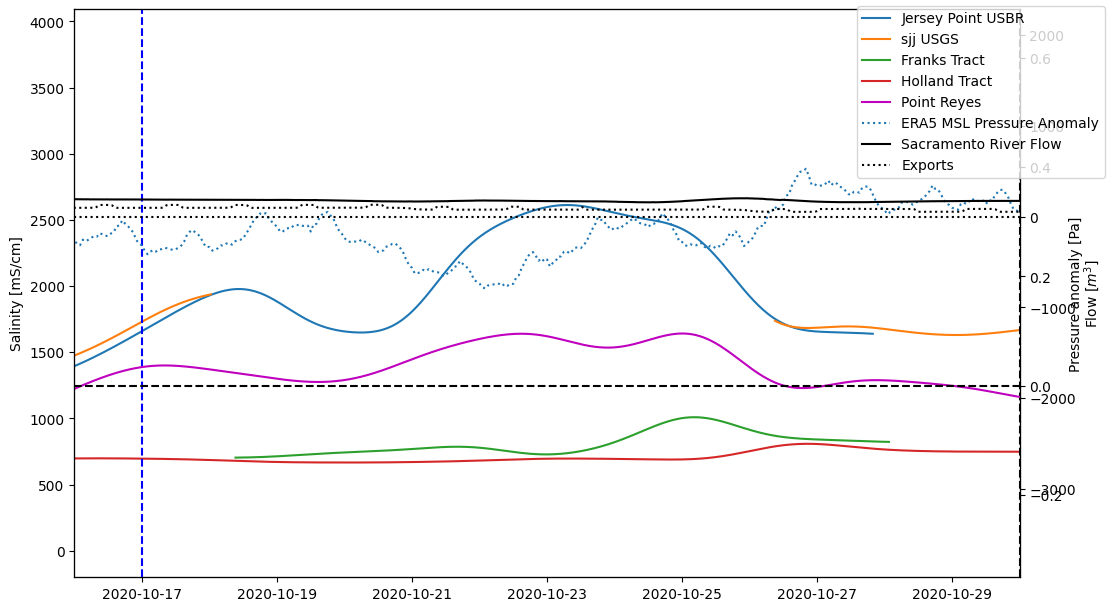

In [62]:
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal['jer_S[mS/cm]'],label='Jersey Point USBR')
#add the other jersey point station to see if we can fill in 
ax.plot(sjj_dms_filt['sjj_S[mS/cm]'],label='sjj USGS')
ax.plot(sal['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

# ax2.plot(pryc_filt['elev[m]'], label='Point Reyes',color='r')
# ax2.set_ylabel("Elevation [m]")

ax2.plot(pr_filt['Residual'], label='Point Reyes',color='m')
ax2.set_ylabel("Residual [m]")
ax2.axhline(y=0, color = 'k',linestyle='--')

ax3=ax.twinx()

ax3.plot(df_pr['msl_a'],label='ERA5 MSL Pressure Anomaly',linestyle=':')
ax2.set_ylabel("Pressure anomaly [Pa]")
ax3.axhline(y=0, color = 'k',linestyle=':')

ax3.plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
ax3.set_ylabel("Flow [$m^3$]")

ax3.plot(flux1.exports, label="Exports", color='k',linestyle=':')
ax3.set_ylabel("Flow [$m^3$]")

#add vertical lines for start and end of subtidal pumping events
#start 1
# ax.axvline(x = datetime(2020,8,12), color = 'b',linestyle='--')#, label = 'axvline - full height')
# #end 1
# ax.axvline(x = datetime(2020,9,5), color = 'k',linestyle='--')
#start 2
ax.axvline(x = datetime(2020,10,17), color = 'b',linestyle='--')
#end 2
ax.axvline(x = datetime(2020,10,30), color = 'k',linestyle='--')
#start 3
ax.axvline(x = datetime(2020,11,23), color = 'b',linestyle='--')#, label = 'axvline - full height')
#end 3
ax.axvline(x = datetime(2020,12,1), color = 'k',linestyle='--')

ax.set_xlim(datetime(2020,10,16),datetime(2020,10,30))
fig.legend()



# 2018 and 2019

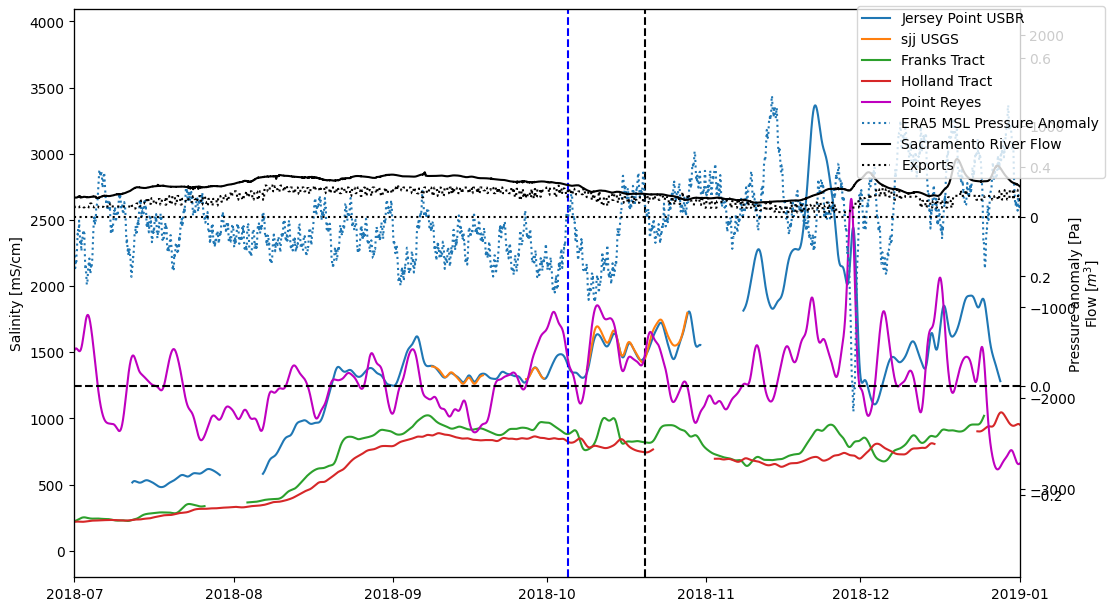

In [59]:
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal['jer_S[mS/cm]'],label='Jersey Point USBR')
#add the other jersey point station to see if we can fill in 
ax.plot(sjj_dms_filt['sjj_S[mS/cm]'],label='sjj USGS')
ax.plot(sal['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

# ax2.plot(pryc_filt['elev[m]'], label='Point Reyes',color='r')
# ax2.set_ylabel("Elevation [m]")

ax2.plot(pr_filt['Residual'], label='Point Reyes',color='m')
ax2.set_ylabel("Residual [m]")
ax2.axhline(y=0, color = 'k',linestyle='--')

ax3=ax.twinx()

ax3.plot(df_pr['msl_a'],label='ERA5 MSL Pressure Anomaly',linestyle=':')
ax2.set_ylabel("Pressure anomaly [Pa]")
ax3.axhline(y=0, color = 'k',linestyle=':')

ax3.plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
ax3.set_ylabel("Flow [$m^3$]")

ax3.plot(flux1.exports, label="Exports", color='k',linestyle=':')
ax3.set_ylabel("Flow [$m^3$]")

# #add vertical lines for start and end of subtidal pumping events
#start 1
ax.axvline(x = datetime(2018,10,5), color = 'b',linestyle='--')#, label = 'axvline - full height')
#end 1
ax.axvline(x = datetime(2018,10,20), color = 'k',linestyle='--')
# #start 2
# ax.axvline(x = datetime(2020,10,17), color = 'b',linestyle='--')
# #end 2
# ax.axvline(x = datetime(2020,10,30), color = 'k',linestyle='--')
# #start 3
# ax.axvline(x = datetime(2020,11,23), color = 'b',linestyle='--')#, label = 'axvline - full height')
# #end 3
# ax.axvline(x = datetime(2020,12,1), color = 'k',linestyle='--')

ax.set_xlim(datetime(2018,7,1),datetime(2019,1,1))
fig.legend()



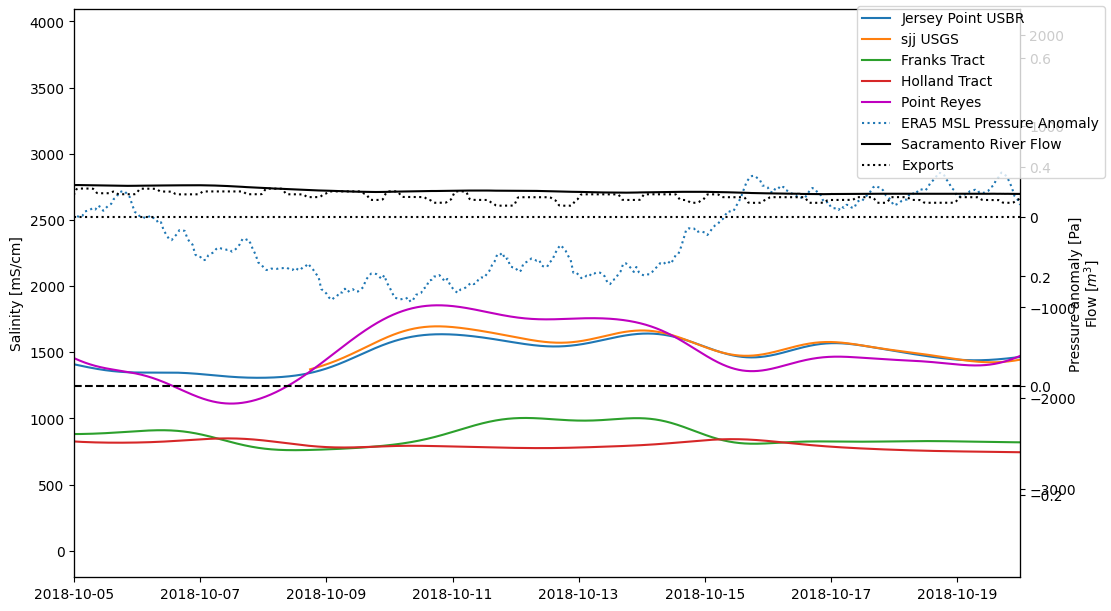

In [60]:
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal['jer_S[mS/cm]'],label='Jersey Point USBR')
#add the other jersey point station to see if we can fill in 
ax.plot(sjj_dms_filt['sjj_S[mS/cm]'],label='sjj USGS')
ax.plot(sal['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

# ax2.plot(pryc_filt['elev[m]'], label='Point Reyes',color='r')
# ax2.set_ylabel("Elevation [m]")

ax2.plot(pr_filt['Residual'], label='Point Reyes',color='m')
ax2.set_ylabel("Residual [m]")
ax2.axhline(y=0, color = 'k',linestyle='--')

ax3=ax.twinx()

ax3.plot(df_pr['msl_a'],label='ERA5 MSL Pressure Anomaly',linestyle=':')
ax2.set_ylabel("Pressure anomaly [Pa]")
ax3.axhline(y=0, color = 'k',linestyle=':')

ax3.plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
ax3.set_ylabel("Flow [$m^3$]")

ax3.plot(flux1.exports, label="Exports", color='k',linestyle=':')
ax3.set_ylabel("Flow [$m^3$]")

# #add vertical lines for start and end of subtidal pumping events
# #start 1
# # ax.axvline(x = datetime(2020,8,12), color = 'b',linestyle='--')#, label = 'axvline - full height')
# # #end 1
# # ax.axvline(x = datetime(2020,9,5), color = 'k',linestyle='--')
# #start 2
# ax.axvline(x = datetime(2020,10,17), color = 'b',linestyle='--')
# #end 2
# ax.axvline(x = datetime(2020,10,30), color = 'k',linestyle='--')
# #start 3
# ax.axvline(x = datetime(2020,11,23), color = 'b',linestyle='--')#, label = 'axvline - full height')
# #end 3
# ax.axvline(x = datetime(2020,12,1), color = 'k',linestyle='--')

ax.set_xlim(datetime(2018,10,5),datetime(2018,10,20))
fig.legend()



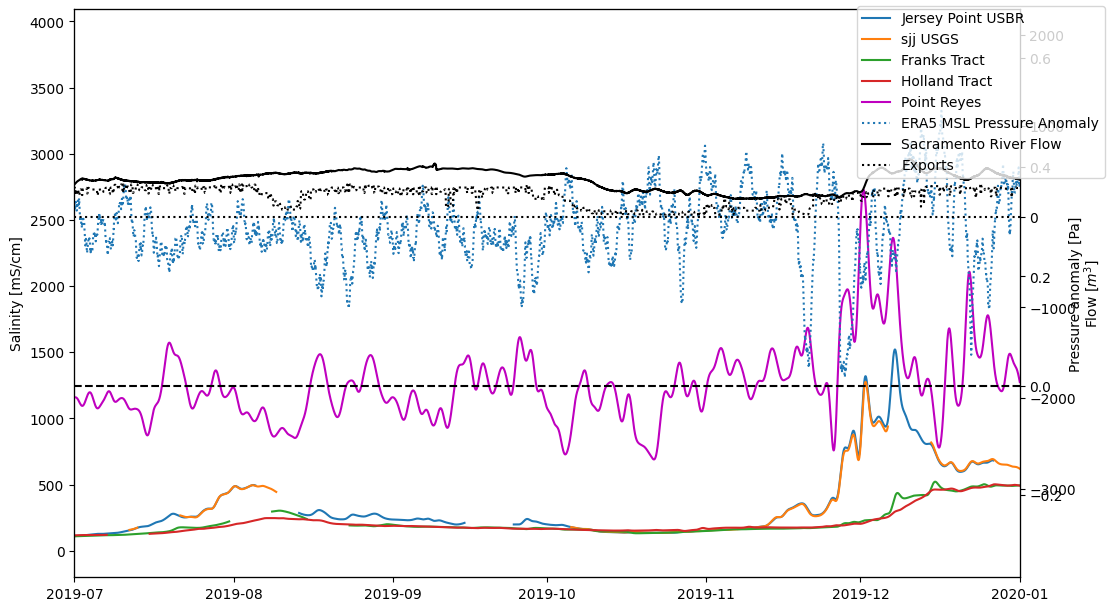

In [50]:
fig, ax = plt.subplots(layout="constrained",sharex=True,figsize=(11,6))

ax.plot(sal['jer_S[mS/cm]'],label='Jersey Point USBR')
#add the other jersey point station to see if we can fill in 
ax.plot(sjj_dms_filt['sjj_S[mS/cm]'],label='sjj USGS')
ax.plot(sal['frk_S[mS/cm]'],label='Franks Tract')
ax.plot(sal['hll_S[mS/cm]'],label='Holland Tract')
ax.set_ylabel("Salinity [mS/cm]")
ax2=ax.twinx()

# ax2.plot(pryc_filt['elev[m]'], label='Point Reyes',color='r')
# ax2.set_ylabel("Elevation [m]")

ax2.plot(pr_filt['Residual'], label='Point Reyes',color='m')
ax2.set_ylabel("Residual [m]")
ax2.axhline(y=0, color = 'k',linestyle='--')

ax3=ax.twinx()

ax3.plot(df_pr['msl_a'],label='ERA5 MSL Pressure Anomaly',linestyle=':')
ax2.set_ylabel("Pressure anomaly [Pa]")
ax3.axhline(y=0, color = 'k',linestyle=':')

ax3.plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
ax3.set_ylabel("Flow [$m^3$]")

ax3.plot(flux1.exports, label="Exports", color='k',linestyle=':')
ax3.set_ylabel("Flow [$m^3$]")

# #add vertical lines for start and end of subtidal pumping events
# #start 1
# # ax.axvline(x = datetime(2020,8,12), color = 'b',linestyle='--')#, label = 'axvline - full height')
# # #end 1
# # ax.axvline(x = datetime(2020,9,5), color = 'k',linestyle='--')
# #start 2
# ax.axvline(x = datetime(2020,10,17), color = 'b',linestyle='--')
# #end 2
# ax.axvline(x = datetime(2020,10,30), color = 'k',linestyle='--')
# #start 3
# ax.axvline(x = datetime(2020,11,23), color = 'b',linestyle='--')#, label = 'axvline - full height')
# #end 3
# ax.axvline(x = datetime(2020,12,1), color = 'k',linestyle='--')

ax.set_xlim(datetime(2019,7,1),datetime(2020,1,1))
fig.legend()



# Subplots for exports and sac river flow + sea level pressure anomaly

In [16]:
lim1=datetime(2020,7,1)
lim2=datetime(2021,1,1)

In [23]:
flux1[lim1:lim2][['sac','exports']].abs().min(axis=None).min()

23.149999618530273

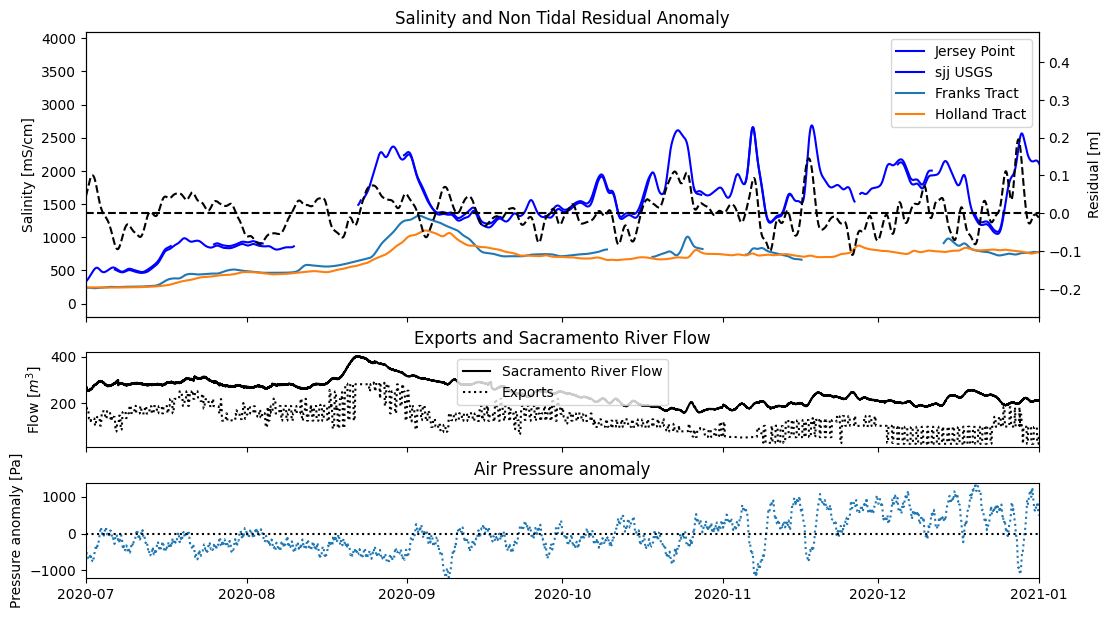

In [26]:
# Try plotting exports and river flow on a second thin subplot below the salinity and elevation plot and then a third plot for sea level pressure
fig, ax = plt.subplots(3,1,layout="constrained",sharex=True,figsize=(11,6),gridspec_kw={'height_ratios': [3, 1, 1]})

#Set the date limits of the plot HERE so I can rescale the axes by min and max in this range 
lim1=datetime(2020,7,1)
lim2=datetime(2021,1,1)

a, = ax[0].plot(sal['jer_S[mS/cm]'],label='Jersey Point',color='b') #USBR
#add the other jersey point station to see if we can fill in 
ax[0].plot(sjj_dms_filt['sjj_S[mS/cm]'],color='b') #,label='sjj USGS'
b, = ax[0].plot(sal['frk_S[mS/cm]'],label='Franks Tract')
c, = ax[0].plot(sal['hll_S[mS/cm]'],label='Holland Tract')
ax[0].set_ylabel("Salinity [mS/cm]")
ax2=ax[0].twinx()
d, = ax2.plot(pr_filt['Residual'], label='Point Reyes',color='k',linestyle='--')
ax2.set_ylabel("Residual [m]")
ax2.axhline(y=0, color = 'k',linestyle='--')
ax[0].set_title('Salinity and Non Tidal Residual Anomaly')
fig.legend()

e, = ax[1].plot(flux1.sac*-1, label="Sacramento River Flow", color='k')
f, = ax[1].plot(flux1.exports, label="Exports", color='k',linestyle=':')
min1=flux1[lim1:lim2][['sac','exports']].abs().min(axis=None).min()-15
max1=flux1[lim1:lim2][['sac','exports']].abs().max(axis=None).max()+15
ax[1].set_ylim([min1,max1])
ax[1].set_ylabel("Flow [$m^3$]")
ax[1].set_title('Exports and Sacramento River Flow')
ax[1].legend()

g, = ax[2].plot(df_pr['msl_a'],label='ERA5 MSL Pressure Anomaly',linestyle=':')
min2=df_pr['msl_a'][lim1:lim2].min()-5
max2=df_pr['msl_a'][lim1:lim2].max()+5
ax[2].set_ylim([min2,max2])
ax[2].set_ylabel("Pressure anomaly [Pa]")
ax[2].axhline(y=0, color = 'k',linestyle=':')
ax[2].set_title('Air Pressure anomaly')


# # #add vertical lines for start and end of subtidal pumping events
# #start 1
# ax.axvline(x = datetime(2018,10,5), color = 'b',linestyle='--')#, label = 'axvline - full height')
# #end 1
# ax.axvline(x = datetime(2018,10,20), color = 'k',linestyle='--')
# #start 2
# ax.axvline(x = datetime(2020,10,17), color = 'b',linestyle='--')
# #end 2
# ax.axvline(x = datetime(2020,10,30), color = 'k',linestyle='--')
# #start 3
# ax.axvline(x = datetime(2020,11,23), color = 'b',linestyle='--')#, label = 'axvline - full height')
# #end 3
# ax.axvline(x = datetime(2020,12,1), color = 'k',linestyle='--')

ax[0].set_xlim(lim1,lim2)
#leg = plt.legend(handles=[a,b,c,d,e,f,g],loc='upper right', bbox_to_anchor=(1.8, 2.0))
plt.show()

